# Lesson3: final part

[Lesson 3](https://github.com/BCDA-APS/use_bluesky/blob/master/notebooks/lesson3.ipynb) demonstrated how bluesky can show data as it is acquired.  This notebook provides a concise summary, which should be a good general starting point for users.

**note**:  This tutorial expects to find an EPICS IOC on the local network configured as a synApps [`xxx`](https://github.com/epics-modules/xxx) IOC with prefix `sky:`.  A docker container is available to provide this IOC.  See this URL for instructions:  https://github.com/prjemian/epics-docker/blob/master/n3_synApps/README.md

In [1]:
%matplotlib inline
from bluesky.utils import install_nb_kicker
install_nb_kicker()

from ophyd import EpicsMotor
from ophyd.scaler import ScalerCH
from bluesky import RunEngine
import bluesky.plans as bp
from bluesky.callbacks.best_effort import BestEffortCallback
from apstools.devices import use_EPICS_scaler_channels

In [2]:
# for jupyterlab ...
# https://stackoverflow.com/a/51932652
# %matplotlib inline

In [3]:
RE = RunEngine({})
RE.subscribe(BestEffortCallback())

P = "sky:"     # use your IOC's PV prefix here

m1 = EpicsMotor(f"{P}m1", name="m1")
scaler = ScalerCH(f"{P}scaler1", name="scaler")
m1.wait_for_connection()
scaler.wait_for_connection()
scaler.select_channels(None)

Count the detector (5 times)



Transient Scan ID: 1     Time: 2020-12-04 14:13:00
Persistent Unique Scan ID: 'df825efe-b7b2-4bdd-a495-1a14dd0516c1'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time |      clock |         I0 |      scint |      diode |      I0Mon |       ROI1 |       ROI2 |
+-----------+------------+------------+------------+------------+------------+------------+------------+------------+
|         1 | 14:13:01.7 |   11000000 |          5 |          5 |          4 |          4 |          0 |          0 |
|         2 | 14:13:04.3 |   11000000 |          4 |          7 |          5 |          6 |          0 |          0 |
|         3 | 14:13:06.7 |   11000000 |          5 |          5 |          5 |          5 |          0 |          0 |
|         4 | 14:13:09.1 |   11000000 |          6 |          4 |          5 |          4 |          0 |          0 |
|         5 | 14:13:11.5 |   1100

('df825efe-b7b2-4bdd-a495-1a14dd0516c1',)

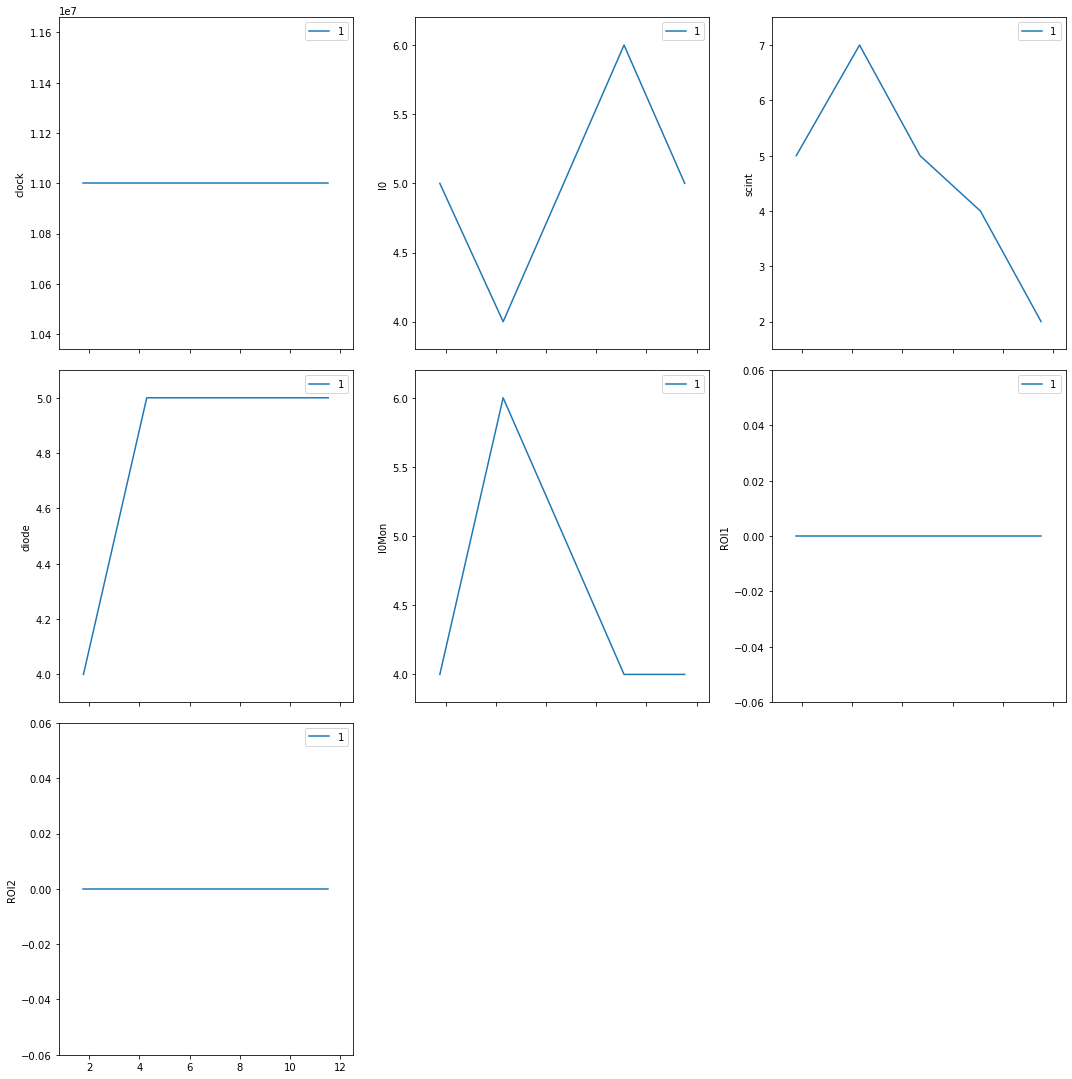

In [4]:
RE(bp.count([scaler], num=5))

Scan the scaler *vs.* the motor with 5 data points.



Transient Scan ID: 2     Time: 2020-12-04 14:13:29
Persistent Unique Scan ID: 'b8c781bd-fa78-4b7f-8ec3-54a4c74b8cd3'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time |         m1 |      clock |         I0 |      scint |      diode |      I0Mon |       ROI1 |       ROI2 |
+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
|         1 | 14:13:32.3 |    1.00000 |   11000000 |          5 |          3 |          5 |          4 |          0 |          0 |
|         2 | 14:13:36.0 |    2.00000 |   11000000 |          6 |          5 |          4 |          4 |          0 |          0 |
|         3 | 14:13:39.7 |    3.00000 |   10000000 |          5 |          5 |          5 |          4 |          0 |          0 |
|         4 | 14:13:43.3 |    4.00000 |   10000000 |          4 |        

('b8c781bd-fa78-4b7f-8ec3-54a4c74b8cd3',)

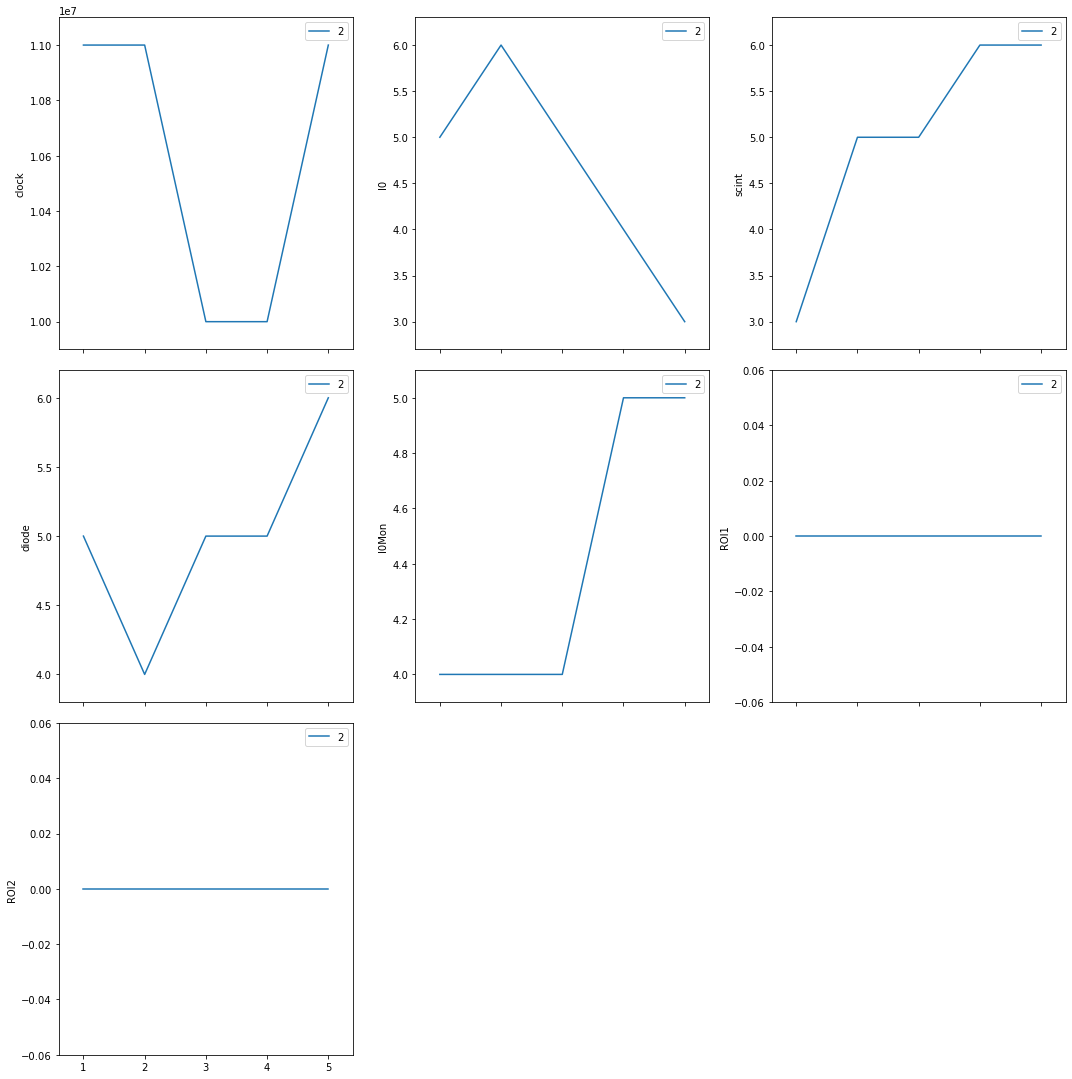

In [5]:
RE(bp.scan([scaler], m1, 1, 5, 5))